In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Notes:

    - both datasets are missing some zipcode values (null) - I populated those to 0 in order to retain the case and date counts.  A way to remove the null rows is to make a new dataframe grouping by zip, and this autoamtically excludes rows with null zip.  
    The number of CASES associated with these null zipcodes is 8412.  
    
    - might be useful to break apart the dates into months?

### Load the COVID test result counts by zip

In [4]:
covid_count = pd.read_csv('../data/COVID_CountByZipPerDate_03292021.csv')

In [58]:
covid_count.dtypes 

Specimen Collection Date     object
Zip                         float64
Cases                         int64
dtype: object

In [74]:
covid_count.shape

(8832, 3)

#### Process to Change zip to int64:
1. FIll in the Nulls using df = df.fillna(0)
2. df['DataFrame Column'] = df['DataFrame Column'].astype(int)

In [61]:
covid_count=covid_count.fillna(0)

In [64]:
covid_count['Zip'] = covid_count['Zip'].astype(int) #df['DataFrame Column'] = df['DataFrame Column'].astype(int)

In [65]:
covid_count.head(5)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217,1
1,3/10/2020,37214,1
2,3/11/2020,37013,1
3,3/11/2020,37204,2
4,3/11/2020,37205,1


In [8]:
max(covid_count['Cases'])
#date with the highest number of cases

272

In [90]:
covid_count.loc[covid_count['Cases'] == 272]
#row with the highest cases in a single zipcode....this zipcode was not entered into the dataset!! Also appears below.

,Specimen Collection Date,Zip,Cases
5592,11/23/2020,0,272


In [104]:
max(covid_count['Specimen Collection Date'])
#date with highest number of zipcodes represented in cases (date when covid was most widespread (or most people getting tested?)

'9/9/2020'

In [101]:
covid_count.loc[covid_count['Specimen Collection Date'] == '9/9/2020']
#date with the highest number of tests at a single zipcode.  This might be invalid because of the zipcode...

,Specimen Collection Date,Zip,Cases
3681,9/9/2020,37115,4
3686,9/9/2020,37204,5
3690,9/9/2020,37208,4
3693,9/9/2020,37211,8
3694,9/9/2020,37212,5
3695,9/9/2020,37214,7
3696,9/9/2020,37215,7
3701,9/9/2020,37220,2
3698,9/9/2020,37217,2
3699,9/9/2020,37218,2


In [88]:
covid_count.Cases.sum()
#total cases in the dataset

93619

In [97]:
covid_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8832 entries, 3681 to 6702
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Specimen Collection Date  8832 non-null   object
 1   Zip                       8832 non-null   int64 
 2   Cases                     8832 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 276.0+ KB


In [75]:
covid_count.isnull().sum()
#This now indicates I covered all my null Zips

Specimen Collection Date    0
Zip                         0
Cases                       0
dtype: int64

In [67]:
covid_count.describe()
#indicates no days with 0 cases
#indicates max day with 272 cases (might be invalid due to zip)

,Zip,Cases
count,8832.000000,8832.000000
mean,35595.081295,10.599977
std,7506.543963,15.487583
min,0.000000,1.000000
25%,37138.000000,2.000000
50%,37207.000000,5.000000
75%,37214.000000,13.000000
max,37238.000000,272.000000


## Creating a new dataframe where the data is sorted by the sum of cases per zip

In [106]:
cases_by_zip=covid_count.groupby(['Zip']).sum() #this dataframe includes zips which were previous null....

In [107]:
cases_by_zip.head(10)

,Cases
Zip,
0,8412
37013,13354
37027,231
37069,16
37072,2984
37076,4279
37080,574
37115,4574
37138,2359


In [81]:
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False) #order the data by total cases high to low by zip

In [116]:
cases_zip_ord.info

<bound method DataFrame.info of        Cases
Zip         
37013  13354
37211  10233
0       8412
37209   5072
37207   4729
37115   4574
37076   4279
37221   3910
37217   3907
37214   3508
37203   3346
37206   3112
37072   2984
37205   2566
37215   2438
37208   2428
37138   2359
37210   2100
37216   2011
37212   1823
37204   1786
37218   1785
37220    656
37080    574
37189    479
37228    310
37201    299
37219    270
37027    231
37213     65
37069     16
37238      3>

Trying the same but for date: (didn't work? - missing rows?)

In [148]:
covid_count["Specimen Collection Date"]= pd.to_datetime(covid_count["Specimen Collection Date"])
#change collection date from object to datetime

In [169]:
cases_by_date_group=covid_count['Specimen Collection Date'].groupby([covid_count['Zip']])

In [171]:
cases_by_date=cases_by_date_group.to_frame(name = 'test').reset_index()

AttributeError: 'SeriesGroupBy' object has no attribute 'to_frame'

In [154]:
cases_by_date = set_index(['Specimen Collection Date']), inplace=True

SyntaxError: cannot assign to function call (<ipython-input-154-d5df0107c4b7>, line 1)

In [170]:
cases_by_date_group.head()

3681   2020-09-09
3686   2020-09-09
3690   2020-09-09
3693   2020-09-09
3694   2020-09-09
          ...    
960    2020-05-10
6002   2020-12-08
5971   2020-12-07
5998   2020-12-07
5030   2020-11-02
Name: Specimen Collection Date, Length: 158, dtype: datetime64[ns]

Trying to plot.....

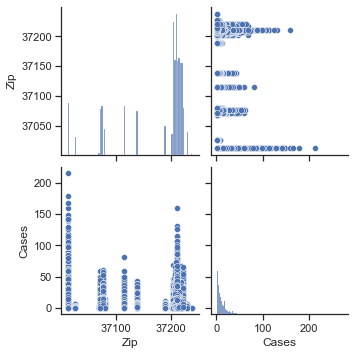

In [16]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(covid_count);

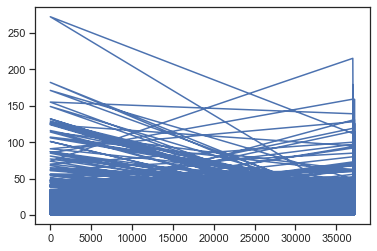

In [130]:
plt.plot('Zip', 'Cases', data=covid_count)

ValueError: x and y must have same first dimension, but have shapes (1,) and (8832,)

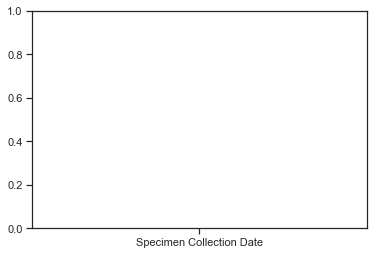

In [151]:
plt.plot(['Specimen Collection Date'], 'Cases', data=covid_count)

### Bring in the vaccination data

In [39]:
vaccines = pd.read_csv('../data/vaccine_with_protocol.csv')

In [40]:
vaccines.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [44]:
vaccines.tail()

,vacc_date,zipcode,count_given,dose_nbr,protocol
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6690,2021-04-07,37228.0,2.0,2.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot
6692,2021-04-07,NaN,1.0,1.0,one-shot
6693,2021-04-07,NaN,7.0,2.0,two-shot


In [69]:
vaccines.isnull().sum()

vacc_date      0
zipcode        0
count_given    8
dose_nbr       8
protocol       0
dtype: int64

In [71]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6694 non-null   int64  
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 261.6+ KB


Convert Zip to int

In [68]:
vaccines.zipcode = vaccines.zipcode.fillna(value=0)

In [70]:
vaccines.zipcode = vaccines.zipcode.astype(int)